# Entendimiento de datos
En este notebook se abordan dos aspectos importantes para el entendimiento de un conjunto de datos, buscando responder a las necesidades de una empresa en términos de análisis de información:
* Exploración y perfilamiento de datos
    * Carga
    * Descripción básica
    * Visualización
    * Perfilamiento

* Calidad de datos e ideas de preparación
  * Completitud
  * Unicidad / Duplicidad
  * Validez / Estandarizacón


In [15]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Este comando es requerido para que las visualizaciones se muestren en este notebook
%matplotlib inline

In [16]:
pd.set_option('display.max_columns', None) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

# Exploración y perfilamiento de datos

## 1. Carga de los datos

In [17]:

# Lectura de datos en formato xlsx
# Los datos son almacenados en memoria usando una estructura de datos de Pandas conocida como dataframe
df_tracks = pd.read_excel('cat_345.xlsx') 

In [18]:
# Dimensiones del dataframe
df_tracks.shape

(3000, 2)

In [19]:
# Impresión de algunos registros del dataframe
df_tracks.sample(5) # Muestra aleatoria
#df_tracks.head(5) # Primeras Filas
#df_tracks.tail(5) # Ultimas Filas

,Textos_espanol,sdg
1726,Dinamarca tiene una proporción comparativament...,4
2822,"En algunos países, las madres solteras no pued...",5
1910,Contiene una variedad de información contextua...,4
2058,"Como se puede ver en la Figura 8, las mujeres ...",5
2212,Los gobiernos también pueden promover la trans...,5


## 2. Descripción de los datos

In [20]:
# Impresión del tipo de dato asociado a cada columna
df_tracks.dtypes

Textos_espanol    object
sdg                int64
dtype: object

#### 2.1 Datos numéricos

In [21]:
# Se calculan las estadísticas principales de las columnas numéricas
df_tracks.describe()

,sdg
count,3000.000000
mean,4.000000
std,0.816633
min,3.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


## 3. Visualización de datos


In [22]:
df_top = df_tracks[['sdg', 'Textos_espanol']].groupby('sdg').sum().sort_values('Textos_espanol', ascending = False).head(20)

In [23]:
df_top

,Textos_espanol
sdg,
5,"Sin embargo, un plan de negocios preparado jui..."
3,"Por ejemplo, el nÃºmero de consultas externas ..."
4,"En promedio, en los países de la OCDE en 2016,..."


In [24]:
df_plot = df_tracks.loc[df_tracks.sdg.isin(df_top.index)]

In [25]:
df_plot.shape

(3000, 2)

## 4. Perfilamiento

Para realizar un perfilamiento general de los datos se puede usar la librería Pandas Profiling.

Esta librería, a partir de los tipos de datos identificados por Pandas, calcula un conjunto de estadísticas y construye algunas visualizaciones estándares para datos de tipo numérico, categórico, temporales, entre otros.

La documentación oficial de Pandas Profiling se puede encontrar aquí: [https://github.com/ydataai/pandas-profiling](https://github.com/pandas-profiling/pandas-profiling).

In [26]:
!pip install pandas-profiling --upgrade

Defaulting to user installation because normal site-packages is not writeable


In [27]:
import pandas_profiling

C:\Users\Camilo\AppData\Local\Temp\ipykernel_1536\1591302161.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [28]:
data_t=df_tracks
textos = data_t.copy()
textos['Conteo'] = [len(x) for x in textos['Textos_espanol']]
textos['Moda'] = [max(set(x.split(' ')), key = x.split(' ').count) for x in textos['Textos_espanol']]
textos['Max'] = [[max([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]
textos['Min'] = [[min([len(x) for x in i.split(' ')])][0] for i in textos['Textos_espanol']]

# Se realiza un perfilamiento de los datos con la libre pandas profiling
pandas_profiling.ProfileReport(textos)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Importante:** En general es buena idea utilizar este tipo de herramientas que automatizan algunos pasos en el proceso de exploración de datos, sin embargo, bajo ningún escenario en ejercicio de exploración se puede limitar solo al uso de esta herramienta. El análisis de los resultados obtenidos es lo más importante.

# Preprocesamiento de datos con un pipeline


## Calidad y preparación de datos

En este punto vamos a analizar diferentes dimensiones de calidad, de acuerdo con los datos y el problema a abordar. Recuerda que el objetivo es entender cómo se encuentran los datos para determinar el esfuerzo requerido para su preparación posterior.

 ## Completitud
Buscar registros con valores faltantes y decidir, desde el contexto del  negocio, que se puede hacer con ellos. Por lo general podemos:
* Eliminar vacios 
* Arreglar caracteres
* Eliminación de stop words 
* Lematización (reducción de dimensionalidad)

### Eliminar vacios 

In [29]:
# Se calcula el porcentaje de valores vacios de cada columna
(df_tracks.isnull().sum() / df_tracks.shape[0]).sort_values(ascending = False)

Textos_espanol    0.0
sdg               0.0
dtype: float64

In [30]:
df_tracks['Textos_espanol'] = df_tracks['Textos_espanol'].astype(str)


In [31]:
def convertir_columna_a_str(df, columna):
    df[columna] = df[columna].astype(str)



### Convertir a minusculas

In [32]:
df_tracks['Textos_espanol'] = df_tracks['Textos_espanol'].str.lower()


In [33]:
def convertir_columna_a_minusculas(df, columna):
    df[columna] = df[columna].str.lower()




### Arreglar caracteres

In [34]:
df_tracks['Textos_espanol'] = df_tracks['Textos_espanol'].str.replace('Ãº','u')
df_tracks['Textos_espanol'] = df_tracks['Textos_espanol'].str.replace('Ã³','o')
df_tracks['Textos_espanol'] = df_tracks['Textos_espanol'].str.replace('Ã±','ñ')
df_tracks['Textos_espanol'] = df_tracks['Textos_espanol'].str.replace('Ã¡','a')
#esta debe ser la ultima en ejecutarse
df_tracks['Textos_espanol'] = df_tracks['Textos_espanol'].str.replace('Ã','i')

### Creación del pipeline

Para nuestro problema definiremos la secuencia de pasos que aplicaremos sobre el conjunto de datos, utilizando tuplas de la forma `(nombre, objeto)`


In [35]:
scaler = StandardScaler()

In [36]:
# Variables Age, AnnualIncome, FamilyMembers
numeric_features = [3, 4, 4]

column_transformer = ColumnTransformer(
    transformers=[
        ("num", scaler, numeric_features),
    ]
)

In [37]:
steps = [
    ("toString", convertir_columna_a_minusculas(df_tracks, 'Textos_espanol')),
    ("ToMinus", convertir_columna_a_minusculas(df_tracks, 'Textos_espanol')),
    ("transformer",column_transformer)
]

In [38]:
pipeline = Pipeline(steps)

## 5 Implementacion Algoritmos

In [39]:
# Importamos las bibliotecas necesarias
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import numpy as np

In [20]:
# Cargamos los datos desde el archivo Excel
df = df_tracks.copy()

# Creamos el transformador BOW
vectorizer = CountVectorizer()

# Ajustamos el transformador a nuestros datos y luego transformamos nuestros datos
X = vectorizer.fit_transform(df['Textos_espanol'])

# Convertimos las etiquetas a números
y = df['sdg'].astype('category').cat.codes

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos el modelo de clasificación (usamos Naive Bayes como ejemplo)
clf = MultinomialNB()

# Entrenamos el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

# Hacemos predicciones con los datos de prueba
y_pred = clf.predict(X_test)

# Evaluamos el rendimiento del modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       313
           1       0.98      0.97      0.97       291
           2       0.96      0.97      0.97       296

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



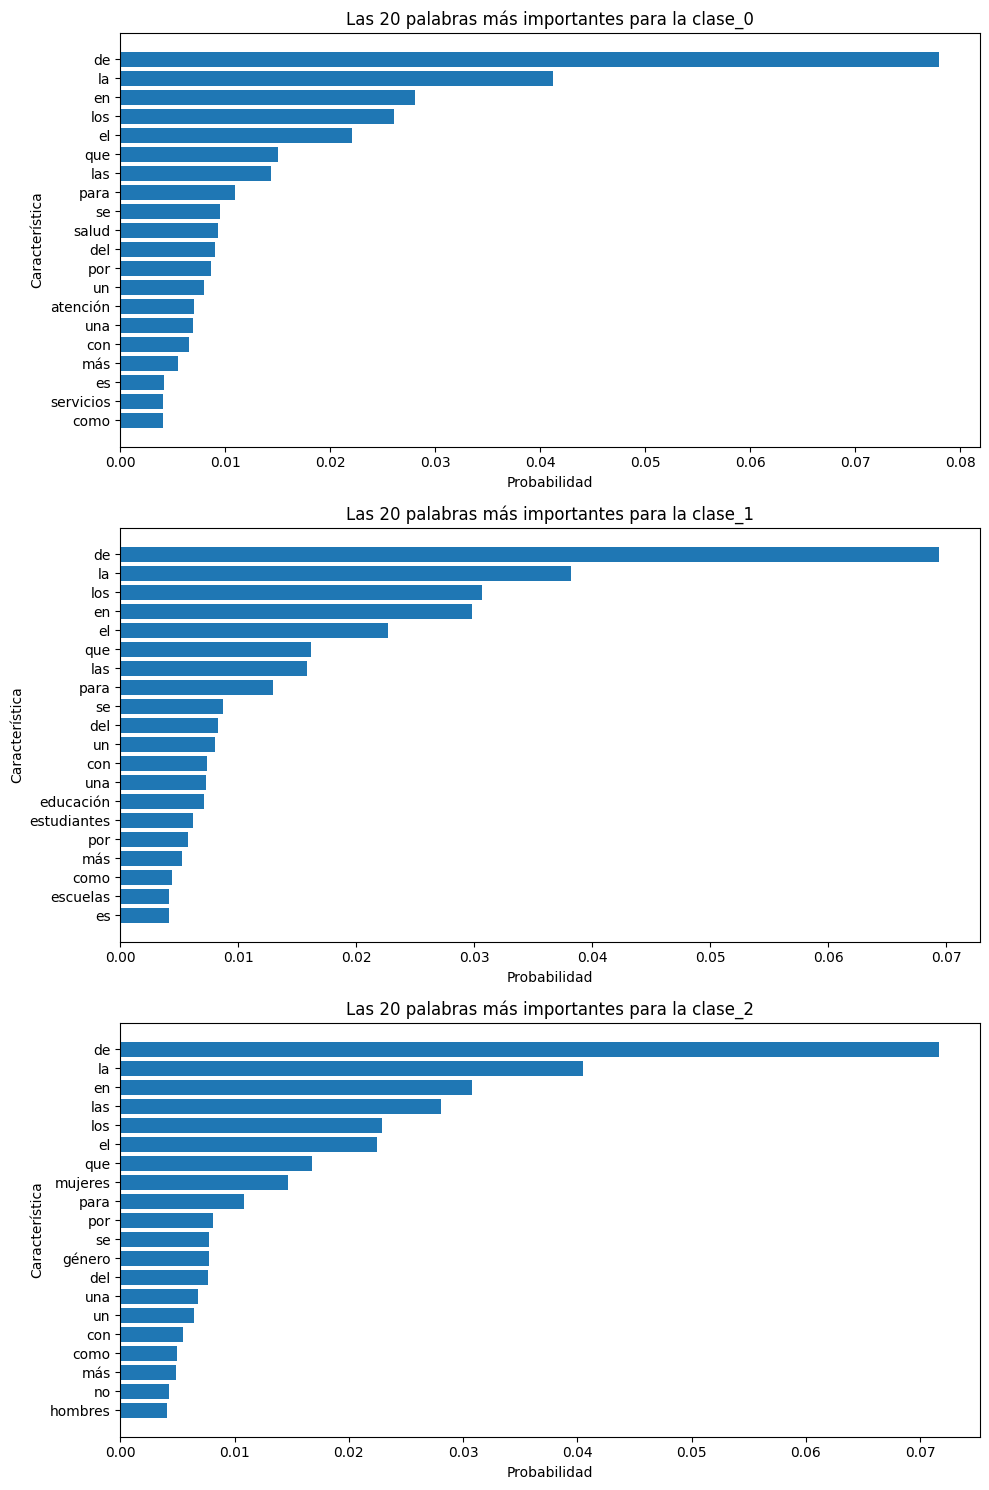

In [21]:
# Obtén las probabilidades logarítmicas de las características
log_probabilities = clf.feature_log_prob_

# Mapea las probabilidades a las palabras
feature_names = vectorizer.get_feature_names_out()

# Crea un DataFrame para cada clase
dfs = []
for i, class_log_prob in enumerate(log_probabilities):
    feature_probabilities = pd.DataFrame({'feature': feature_names, 'probability': np.exp(class_log_prob)})
    feature_probabilities = feature_probabilities.sort_values('probability', ascending=False)
    feature_probabilities['class'] = f'class_{i}'
    dfs.append(feature_probabilities)

# Combina los DataFrames
feature_probabilities = pd.concat(dfs)

# Grafica las 20 características más importantes para cada clase
import matplotlib.pyplot as plt

fig, axs = plt.subplots(len(log_probabilities), figsize=(10, 5*len(log_probabilities)))

for i, df in enumerate(dfs):
    axs[i].barh(df['feature'][:20], df['probability'][:20])
    axs[i].set_xlabel('Probabilidad')
    axs[i].set_ylabel('Característica')
    axs[i].set_title(f'Las 20 palabras más importantes para la clase_{i}')
    axs[i].invert_yaxis()

plt.tight_layout()
plt.show()


## One Hot + Regresion


In [22]:
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

In [23]:

# Cargamos los datos desde el archivo Excel
df2 = df_tracks.copy()

# Creamos el transformador One-Hot
vectorizer = LabelBinarizer()

# Ajustamos el transformador a nuestros datos y luego transformamos nuestros datos
X = vectorizer.fit_transform(df2['Textos_espanol'])

# Convertimos las etiquetas a números
y = df2['sdg'].astype('category').cat.codes

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos el modelo de clasificación (usamos Regresión Logística como ejemplo)
clf = LogisticRegression()

# Entrenamos el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

# Hacemos predicciones con los datos de prueba
y_pred = clf.predict(X_test)

# Evaluamos el rendimiento del modelo
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       313
           1       0.32      1.00      0.49       291
           2       0.00      0.00      0.00       296

    accuracy                           0.32       900
   macro avg       0.11      0.33      0.16       900
weighted avg       0.10      0.32      0.16       900



C:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Python38\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

In [25]:
# Cargamos los datos desde el archivo Excel
df3 = df_tracks.copy()

# Creamos el transformador TF-IDF
vectorizer = TfidfVectorizer()

# Ajustamos el transformador a nuestros datos y luego transformamos nuestros datos
X = vectorizer.fit_transform(df3['Textos_espanol'])

# Convertimos las etiquetas a números
y = df3['sdg'].astype('category').cat.codes

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creamos el modelo de clasificación (usamos Random Forest como ejemplo)
clf = RandomForestClassifier()

# Entrenamos el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

# Hacemos predicciones con los datos de prueba
y_pred = clf.predict(X_test)

# Evaluamos el rendimiento del modelo
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97       313
           1       0.97      0.97      0.97       291
           2       0.96      0.98      0.97       296

    accuracy                           0.97       900
   macro avg       0.97      0.97      0.97       900
weighted avg       0.97      0.97      0.97       900



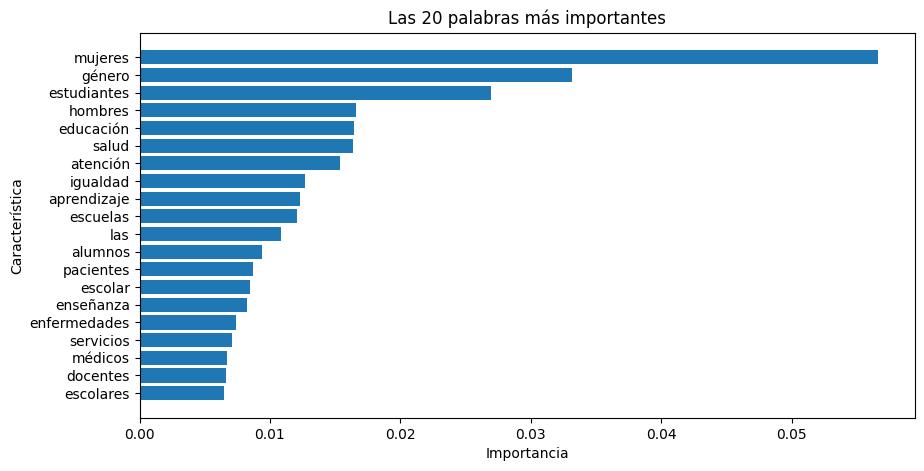

In [26]:
# Obtén las características más importantes
importances = clf.feature_importances_

# Mapea las importancias a las palabras
feature_names = vectorizer.get_feature_names_out()
feature_importances = pd.DataFrame({'feature': feature_names, 'importance': importances})

# Ordena las características por importancia
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Grafica las 20 características más importantes
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.barh(feature_importances['feature'][:20], feature_importances['importance'][:20])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Las 20 palabras más importantes')
plt.gca().invert_yaxis()
plt.show()